In [1]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from ito_diffusion_1d import *
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.style.use('dark_background')

In [2]:
params = {
    'font.size': 14,
    'figure.figsize': (11,18),
    'axes.labelsize': 12,
    'xtick.labelsize': 12,d
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

In [3]:
T = 1
SCHEME_STEPS = 500
LAGS = 10

## Brownian motion, with and without drift

Do not confuse autocorrelation and drift!

The drift does not change the autocorrelation, it is a deterministic component around which the process oscillates.

Returns of Brownian motion do not exhibit any autocorrelation (by construction, it is a sum of independant Gaussian increments).

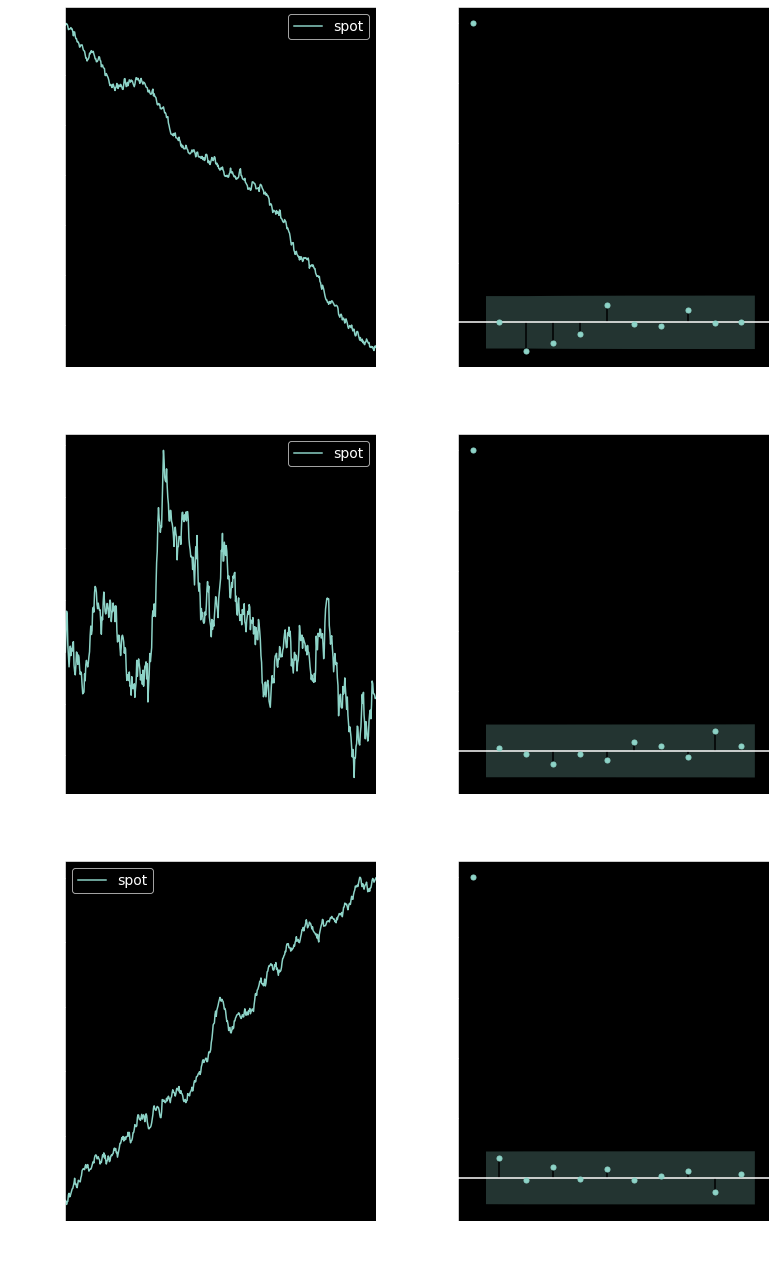

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=2)

drifts = [-5.0, 0.0, 5.0]

X = BM(x0=100, T=T, scheme_steps=SCHEME_STEPS, vol=1,\
           barrier=0, barrier_condition='absorb')

for i, ax_row in enumerate(axes):
    drift = drifts[i]
    X.drift_double = drift
    df = X.simulate()
    
    ax = ax_row[0]
    df.plot(kind='line', ax=ax)
    ax.set_xlabel('time\ndrift={:.2f}'.format(drift))
    ax.set_ylabel('spot')
    ax.legend()

    ax = ax_row[1]
    rets = ((df-df.shift(1))/df.shift(1)).iloc[1:]
    plot_acf(rets.values, lags=LAGS, ax=ax, zero=True, title='')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    ax.set_xlabel('time\ndrift={:.2f}'.format(drift))
    ax.set_ylabel('autocorrelogram')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

plt.tight_layout()
plt.show()

## Vasicek model

Vasicek-like mean-reverting processes do not exhibit material autocorrelation, which follows from their definition as solution to SDEs driven by standard Brownian motion. In other word, the mean-reversion is a large-scale property of the trajectories, however locally the Gaussian random oscillations suppress any autocorrelation.

One can create artificial autocorrelations for extreme values of the mean-reversion. In this case large negative/positive correlation arise for for odd/even lags : each subsequent time step tends to move the process in the opposite direction to correct for the noise and revert to the long-term mean. Not that this is a numerical artifact due to the discrete time steps involved in the simulation.

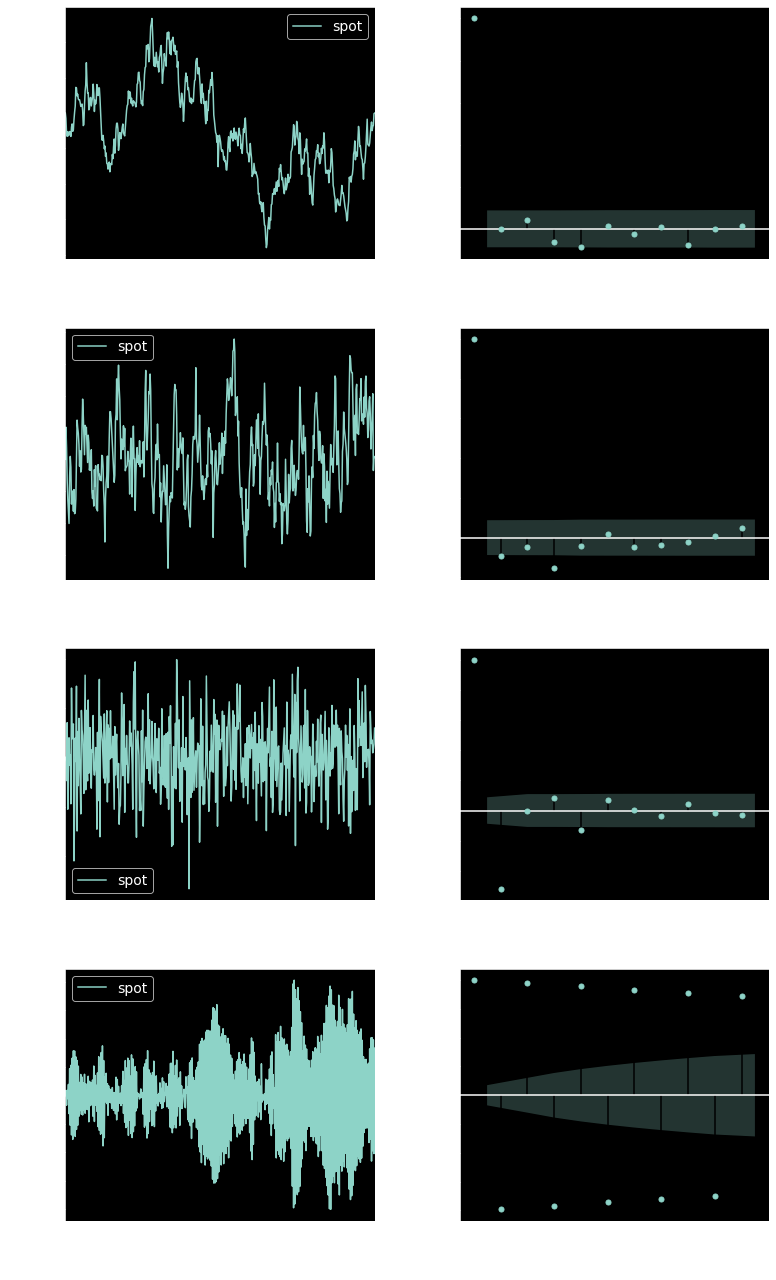

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=2)

mean_reversions = [1.0, 1e1, 5e1, 1e2]

X = Vasicek(x0=100, T=10, scheme_steps=SCHEME_STEPS, vol=1,\
            long_term=100,\
            barrier=0, barrier_condition='absorb')

for i, ax_row in enumerate(axes):
    mean_reversion = mean_reversions[i]
    X.mean_reversion = mean_reversion
    df = X.simulate()
    
    ax = ax_row[0]
    df.plot(kind='line', ax=ax)
    ax.set_xlabel('time\nmean reversion={:.2f}'.format(mean_reversion))
    ax.set_ylabel('spot')
    ax.legend()

    ax = ax_row[1]
    rets = ((df-df.shift(1))/df.shift(1)).iloc[1:]
    plot_acf(rets.values, lags=LAGS, ax=ax, zero=True, title='')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    ax.set_xlabel('time\nmean reversion={:.2f}'.format(mean_reversion))
    ax.set_ylabel('autocorrelogram')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

plt.tight_layout()
plt.show()

## Fractional Brownian motion

* $H=\frac{1}{2}$ : Brownian motion
* $H<\frac{1}{2}$ : mean-reverting, rougher sample paths
* $H>\frac{1}{2}$ : trend-following, smoother sample paths

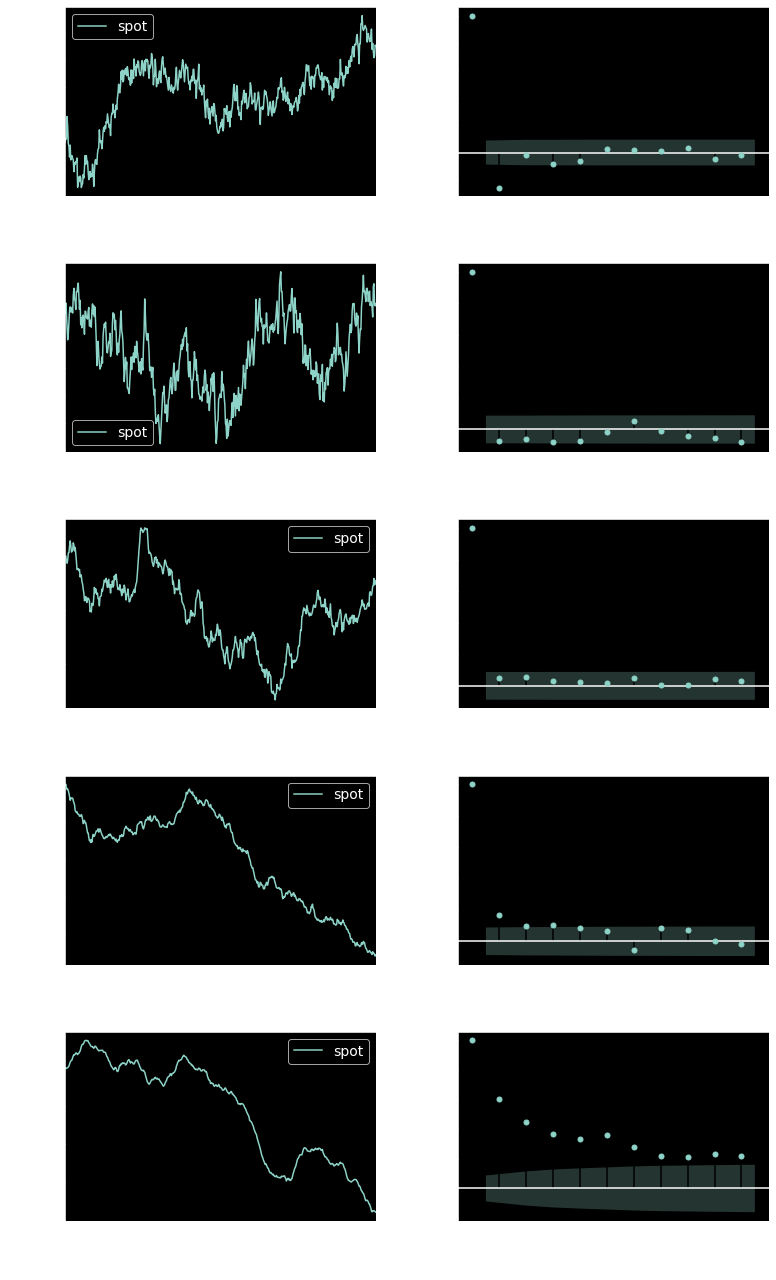

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=2)

X = FBM(x0=100, T=T, scheme_steps=SCHEME_STEPS, drift=0, vol=1)

Hs = [0.3, 0.4, 0.5, 0.6, 0.9]

for i, ax_row in enumerate(axes):
    H = Hs[i]
    X.H = H
    df = X.simulate()
    
    ax = ax_row[0]
    df.plot(kind='line', ax=ax)
    ax.set_xlabel('time\nH={:.2f}'.format(H))
    ax.set_ylabel('spot')
    ax.legend()

    ax = ax_row[1]
    rets = ((df-df.shift(1))/df.shift(1)).iloc[1:]
    plot_acf(rets.values, lags=LAGS, ax=ax, zero=True, title='')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    ax.set_xlabel('time\nH={:.2f}'.format(H))
    ax.set_ylabel('autocorrelogram')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

plt.tight_layout()
plt.show()